In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

from correlation_analysis import corr_matrix
from correlation_analysis import set_layout

MAKE CORRELATION HEAT MAPS FOR TWO/MULTI STATE FOLDERS, SUBDIVIDED BY THEIR CO

Load correlation data, calculated in 'CT_FoldingRate_corr'

In [13]:
file_name='fractions_co50_5_4res'
higher = pd.read_excel('results/{}/higherCO.xls'.format(file_name))
ave=pd.read_excel('results/{}/aveCO.xls'.format(file_name))
lower= pd.read_excel('results/{}/lowerCO.xls'.format(file_name))

#print data
display(higher)
display(ave)
display(lower)

,series corr,series pvalue,parallel corr,parallel pvalue,cross corr,cross pvalue,folder
0,0.01,0.973,0.53,0.075,-0.59,0.045,two
1,-0.58,0.019,0.33,0.206,0.65,0.006,multi


,series corr,series pvalue,parallel corr,parallel pvalue,cross corr,cross pvalue,folder
0,0.02,0.892,-0.08,0.607,0.08,0.615,two
1,-0.43,0.075,0.43,0.072,0.06,0.802,multi


,series corr,series pvalue,parallel corr,parallel pvalue,cross corr,cross pvalue,folder
0,-0.45,0.016,0.27,0.157,0.24,0.218,two
1,-0.93,0.002,0.83,0.021,0.94,0.001,multi


Make correlation matrix: all values that yield pvalue<0.05 are eliminated

In [15]:
corr_corrected=corr_matrix(higher, ave, lower)

Plot heatmap

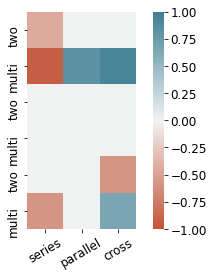

In [16]:
SMALL_SIZE = 12
MEDIUM_SIZE = 13
BIGGER_SIZE = 17
set_layout(SMALL_SIZE,MEDIUM_SIZE,BIGGER_SIZE)

ax = sns.heatmap(
    corr_corrected, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
xlabels=['series','parallel','cross']
ylabels=['two','multi','two','multi','two','multi']
ax.set_xticklabels(xlabels)
ax.set_yticklabels(ylabels)
plt.xticks(rotation=30)
plt.savefig('results/{}/figures/CO_correlation.jpg'.format(file_name))
plt.savefig('results/{}/figures/CO_correlation.eps'.format(file_name),bbox_inches='tight')